In [12]:
#importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [1]:
#Loading iris dataset and naming the columns as below.

df_iris=pd.read_csv('iris.csv.data',names=['sepal_length','sepal_width','petal_length','petal_width','Class'])
df_iris.head()

<IPython.core.display.Javascript object>

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
#splitting the data into development and test data Randomly.

dev_data=df_iris.sample(frac=0.8) #splitting the data into 80 % dev_data
test_data=df_iris.drop(dev_data.index) # splitting data into 20% test data.
train_dev_data=dev_data.sample(frac=0.75)# splitting the dev_data into 75% train data.
actual_dev_data=dev_data.drop(train_dev_data.index)# splitting the dev_data data into 25% actual development data.

#Taking the first four coulmns of the dataframe as x_data
x_train_dev_data=train_dev_data.to_numpy()[:,:4] 
x_actual_dev_data=actual_dev_data.to_numpy()[:,:4]

#Taking the class column into y_data which is used for development data to determine k
y_train_dev_data=train_dev_data.to_numpy()[:,4]
y_actual_dev_data=actual_dev_data.to_numpy()[:,4]

x_test=test_data.to_numpy()[:,:4]
y_test=test_data.to_numpy()[:,4]

#Converting the dataframe into numpy array.
dev_data=dev_data.to_numpy()
test_data=test_data.to_numpy()
train_dev_data=train_dev_data.to_numpy()
actual_dev_data=actual_dev_data.to_numpy()

#printing the sizes of the training data, development data and the test data after split.
print('The initial size of the iris dataset is {}'.format(df_iris.shape[0]))
print('The size of the training data is : {}'.format(train_dev_data.shape[0]))
print('The size of the development data is : {}'.format(actual_dev_data.shape[0]))
print('The size of the test data is : {}'.format(test_data.shape[0]))


The initial size of the iris dataset is 150
The size of the training data is : 90
The size of the development data is : 30
The size of the test data is : 30


In [29]:
#printing x development data and y development data
print(' The x development data is: \n{}'.format(x_dev[:5,:]))
print('--'*50)
print('The Y development data is: \n{}'.format(y_dev[:5]))

 The x development data is: 
[[6.2 2.9 4.3 1.3]
 [7.6 3.0 6.6 2.1]
 [4.3 3.0 1.1 0.1]
 [5.7 2.8 4.5 1.3]
 [6.9 3.1 4.9 1.5]]
----------------------------------------------------------------------------------------------------
The Y development data is: 
['Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor']


In [34]:
#Defining Eculidean distance and calculating it.
def euclidean_distance(row1,row2):
    e_dist=0.0
    for i in range(len(row1)-1):
#         print(row1)
#         print(row2)
        e_dist=e_dist+((row1[i]-row2[i])**2)
    
    return np.sqrt(e_dist)
        
#Defining the normalized euclidean distances.
def normalized_euclidean_distance(row1,row2):
    row1=row1[:4]
    row2=row2[:4]
    mean_r1=sum(row1)/(len(row1)-1)
    mean_r2=sum(row2)/(len(row2)-1)
    std_r1=np.std(row1)
    std_r2=np.std(row2)
    neuc_dist=0.0
    for i in range(len(row1)):
        neuc_dist=neuc_dist+((row1[i]-mean_r1/std_r1)-(row2[i]-mean_r2/std_r2))**2
    return np.sqrt(neuc_dist)

#Defining the cosine similarity metrics for KNN.
def cosine_similarity(row1,row2):
    row1=row1[:4]
    row2=row2[:4]
    mag_r1=np.sqrt(sum([i**2 for i in row1]))
    mag_r2=np.sqrt(sum([i**2 for i in row2]))
    dot_product=row1.dot(row2)
    return (1-(dot_product/(mag_r1*mag_r2)))

In [88]:
#Function Ccalculating accuracy of Predictions.
def accuracy_percentange(y_actual_dev_data,predicted):
    n_correct=0
    for i in range(len(y_actual_dev_data)):
        #print(y_dev[i],predicted[i])
        if y_actual_dev_data[i]==predicted[i]:
            n_correct=n_correct+1
    #print(n_correct)
    return float((n_correct*100/len(y_actual_dev_data)))

In [64]:
# Now predicting the value of the development data using different distance metrics.

# prediction using the euclidean distance.
def nearest_neighbour_euclidean(train_dev_data,x_actual_dev_data_row,k):
    distances=[]
    class_list=[]
    for train_dev_data_row in train_dev_data: #for each training-data calculate the distance of the development data row 
        dist=euclidean_distance(train_dev_data_row,x_actual_dev_data_row)
        distances.append((train_dev_data_row,dist))
    distances.sort(key = lambda x: x[1])
    nearest_neighbours=[]
    
    for i in range(k): #Taking the k nearest neighbours of the dev_data_row.
        nearest_neighbours.append(distances[i][0])
    
    for neighbour in nearest_neighbours:
        class_list.append(neighbour[-1])
    
    prediction = max(set(class_list), key=class_list.count) #predicting the class labelby the majority vote from all the classes
    return prediction

def nearest_neighbour_normalized_euclidean(train_dev_data,x_actual_dev_data_row,k):
    distances=[]
    class_list=[]
    for train_dev_data_row in train_dev_data:#for each training-data calculate the distance of the development data row
        dist=normalized_euclidean_distance(train_dev_data_row,x_actual_dev_data_row)
        distances.append((train_dev_data_row,dist))
    distances.sort(key = lambda x: x[1])
    nearest_neighbours=[]
    
    for i in range(k): #Taking the k nearest neighbours of the dev_data_row
        nearest_neighbours.append(distances[i][0])
    for neighbour in nearest_neighbours:
        class_list.append(neighbour[-1])
    
    prediction = max(set(class_list), key=class_list.count) #predicting the class labelby the majority vote from all the classes
    return prediction
def nearest_neighbour_cosine_similarity(train_dev_data,x_actual_dev_data_row,k):
    distances=[]
    class_list=[]
    for train_dev_data_row in train_dev_data:
        dist=cosine_similarity(train_dev_data_row,x_actual_dev_data_row)
        distances.append((train_dev_data_row,dist))
    distances.sort(key = lambda x: x[1])
    nearest_neighbours=[]
    for i in range(k):  #Taking the k nearest neighbours of the dev_data_row
        nearest_neighbours.append(distances[i][0])
    #print(nearest_neighbours)
    for neighbour in nearest_neighbours:
        class_list.append(neighbour[-1])
    
    prediction = max(set(class_list), key=class_list.count) #predicting the class labelby the majority vote from all the classes
    return prediction
    

## Determining the best K value and the metric based on the accuracy

The accuracy value for k=1 is 96.66666666666667 
The accuracy value for k=3 is 100.0 
The accuracy value for k=5 is 96.66666666666667 
The accuracy value for k=7 is 100.0 


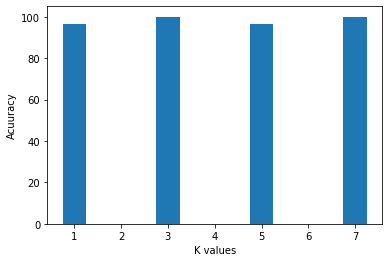

In [90]:
#Accuracy for Euclidean distance model
%matplotlib inline
k=[1,3,5,7]
accuracy_list=[]
for each_k in k:
    p=[]
    for x_actual_dev_data_row in x_actual_dev_data:#for each row in development data we predict the class label using the train data
        p.append(nearest_neighbour_euclidean(train_dev_data,x_actual_dev_data_row,each_k))#insering the predicted class in list p
    accuracy=accuracy_percentange(y_actual_dev_data,p)#Calculting percentage of accuracy by comparing predicted vs actual
    accuracy_list.append(accuracy)

plt.bar(k,accuracy_list,width=0.5,)
plt.xlabel('K values')
plt.ylabel('Acuuracy')
for i in range(len(k)):
    print('The accuracy value for k={} is {} '.format(k[i],accuracy_list[i])) #printing the accuracy list for different k values.


The accuracy scores for different K values of normalized euclidean model
 
------------------------------------------------------------------------------------------------------------------------
The accuracy value for k=1 is 96.66666666666667 
The accuracy value for k=3 is 93.33333333333333 
The accuracy value for k=5 is 100.0 
The accuracy value for k=7 is 93.33333333333333 


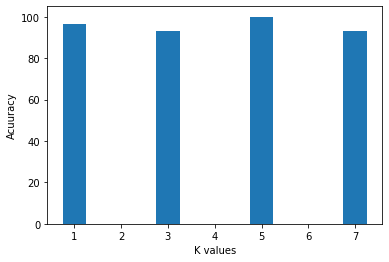

In [96]:
#Accuracy for normalized euclidean model.
k=[1,3,5,7]
accuracy_list=[]
for each_k in k:
    p=[]
    for x_actual_dev_data_row in x_actual_dev_data:
        p.append(nearest_neighbour_normalized_euclidean(train_dev_data,x_actual_dev_data_row,each_k))
    accuracy=accuracy_percentange(y_actual_dev_data,p)
    accuracy_list.append(accuracy)

plt.bar(k,accuracy_list,width=0.5)
plt.xlabel('K values')
plt.ylabel('Acuuracy')
print('The accuracy scores for different K values of normalized euclidean model\n ')
print('--'*60)
for i in range(len(k)):
    print('The accuracy value for k={} is {} '.format(k[i],accuracy_list[i])) #printing the accuracy list for different k values.

The accuracy scores for different K values of Cosine Similarity model
 
------------------------------------------------------------------------------------------------------------------------
The accuracy value for k=1 is 96.66666666666667 
The accuracy value for k=3 is 96.66666666666667 
The accuracy value for k=5 is 100.0 
The accuracy value for k=7 is 96.66666666666667 


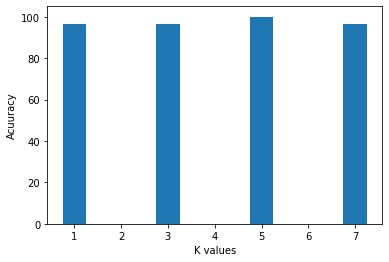

In [97]:
#Accuracy for Cosine similarity model.
k=[1,3,5,7]
accuracy_list=[]
for each_k in k:
    p=[]
    for x_actual_dev_data_row in x_actual_dev_data:
        p.append(nearest_neighbour_cosine_similarity(train_dev_data,x_actual_dev_data_row,each_k))
    accuracy=accuracy_percentange(y_actual_dev_data,p)
    accuracy_list.append(accuracy)

plt.bar(k,accuracy_list,width=0.5)
plt.xlabel('K values')
plt.ylabel('Acuuracy')
print('The accuracy scores for different K values of Cosine Similarity model\n ')
print('--'*60)
for i in range(len(k)):
    print('The accuracy value for k={} is {} '.format(k[i],accuracy_list[i])) #printing the accuracy list for different k values.


<h3> Based on above performance of the model we could see that the cosine similarity model when k=5 is performing better and cosine metric is better when dimesionality is high </h3>

In [100]:
#calculating accuracy of the best model on the test data.
accuracy_list=[]
p=[]
for x_test_row in x_test:
    p.append(nearest_neighbour_cosine_similarity(train_dev_data,x_test_row,5))# for k=5 applying cosine similarity.
accuracy=accuracy_percentange(y_test,p)
accuracy_list.append(accuracy)


print('The accuracy of the test data for cosine similarity when k=5 is {}'.format(accuracy_list[0]))

The accuracy of the test data for cosine similarity when k=5 is 93.33333333333333


<h3>References</h3>


Code Overview:<a href="https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/" target="_blank">https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/</a>.



Sorting tuples:<a href="https://www.geeksforgeeks.org/python-program-to-sort-a-list-of-tuples-by-second-item/" target="_blank">https://www.geeksforgeeks.org/python-program-to-sort-a-list-of-tuples-by-second-item/</a>.

Splitting Data Randomly:<a href="https://www.geeksforgeeks.org/divide-a-pandas-dataframe-randomly-in-a-given-ratio/" target="_blank">https://www.geeksforgeeks.org/divide-a-pandas-dataframe-randomly-in-a-given-ratio/</a>.

Normalized Euclidean distance:<a href="https://stackoverflow.com/questions/38161071/how-to-calculate-normalized-euclidean-distance-on-two-vectors/54170399" target="_blank">https://stackoverflow.com/questions/38161071/how-to-calculate-normalized-euclidean-distance-on-two-vectors/54170399</a>.


[Code Overview:](https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch) 